# Analyzing Police Shooting
### 1. Import Packages
### 2. Load and Inspect Data 
### 3. DateTime Feature Engineering
### 4. Missing Values
### 5. EDA

# 1. Importing Packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load and Inspect Data

In [4]:
shootings = pd.read_csv('/Users/alexanderhumpert/Desktop/fatal-police-shootings-data.csv')

In [5]:
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
shootings.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

From these viewing the first few columns and counting the missing values in each column we can determine the extent 
pre-EDA cleaning we must perform to prepare the data for analysis: feature engineer a 'month' and 'year' columns 
and deterine how to deal with the null-values. 

# 3. DateTime Feature Engineering


In [7]:
shootings['month'] = pd.to_datetime(shootings['date']).dt.month
shootings['year'] = pd.to_datetime(shootings['date']).dt.year
shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'month', 'year'],
      dtype='object')

We have now parsed out a month and year column to the the dataframe.

# 4. Missing Values

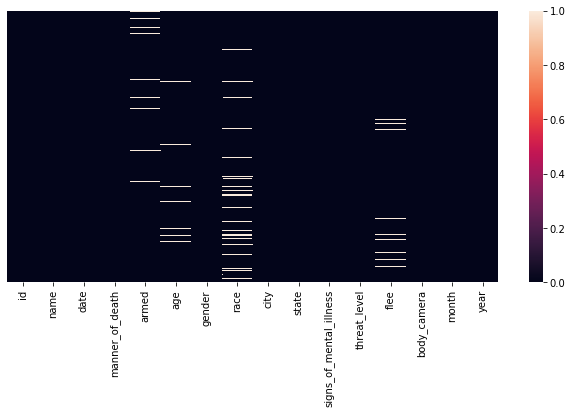

In [8]:
fig, ax = plt.subplots(figsize=(11,5))   
sns.heatmap(shootings.isnull(),yticklabels=False, ax=ax)

This heatmap allows us to identify which entries of which columns have missing data, this does not look so bad: only
4 of the original 12 columns have missing data ('armed', 'age', 'race' and 'flee'). 
However, it would be more helpful to determine exactly what proportion of the data is missing. This can give us 
more info to help us decide on how to deal with it. 

In [9]:
missing_percentage = shootings.isna().sum()*100/shootings.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
month                      0.000000
year                       0.000000
dtype: float64

It appears that on avereage 4% of the data for 'armed', 'age' and 'flee' columns is missing and approx 10% of the 
race data. Simply dropping this data from the dataframe will not cause too much information from being lost. 

In [10]:
shootings.dropna(inplace = True)

# 5. EDA
#### 5.1 Structure of Data
#### 5.2 Difference in threat levels categories
#### 5.3 Difference in age.
#### 5.4 Differences in gender

## 5.1 Structure of Data 

#### Average Victim demographic:
By simply peering into each column we can already find some interesting insights. The average victim of a police shooting in the USA is a 34 (median) year-old white male shot in January with a high likelyhood of showing signs of mental illness (76%), of being armed with some type of weapon (99%) and attacking officers with said weapon (66%). 

#### Age: 
The mean age of victims of fatal police shootings are 36 and a median of 34, suggesting that shape of the distribution is positively skewed with a majority of victims falling above the median age of 34. 

#### Race: 
Black and Hispanic Americans are over-represented in fatal police shootings, although black americans to a higher degree. Black Americans make up 26% of total cases, twice their proportion out of the entire population currently living in America at 13%, whereas Hispanics make up 18%, only 2 percentage points greater than the proportion they occupy in America in general at 16%. White Americans on the other hand are uderepresented, at 51% of all cases, approximately 9 percentage points below the proportion of the entire population at 60%. 

#### Gender: 
95.5% of fatal police shootings are of men, whereas only 0.5% are of women. 

#### Location: 
California sees a whopping 14% of all police shootings, the next states with the most police shootings in descending order are Texas (8.7%), Florida (6.6%), Arizona (4.5%), Colorado, Georgia, Oklahoma, North Carolina and Ohio each at approximately (3.3%) and Tennessee, Washington and Montana at approximately 0.25%. 
The top three cities that see the greatest proportion of fatal police shootings are Los Angeles (1.4%), Phoenix (1.3%) and Houston (1.0%). 

#### Body Camera:
Of all police shootings, 88% of officers did not wear or did not have body cameras turned on.


In [11]:
shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'month', 'year'],
      dtype='object')

In [12]:
shootings.describe()

,id,age,month,year
count,4399.000000,4399.000000,4399.00000,4399.000000
mean,2882.397363,36.632871,6.02887,2017.165038
std,1694.386003,12.803017,3.45040,1.592972
min,3.000000,6.000000,1.00000,2015.000000
25%,1402.500000,27.000000,3.00000,2016.000000
50%,2832.000000,34.000000,6.00000,2017.000000
75%,4345.500000,45.000000,9.00000,2018.500000
max,5925.000000,91.000000,12.00000,2020.000000


In [13]:
shootings['manner_of_death'].value_counts(normalize = True)

shot                0.947715
shot and Tasered    0.052285
Name: manner_of_death, dtype: float64

In [14]:
shootings['armed'].value_counts(normalize = True)

gun                                 0.590134
knife                               0.150034
unarmed                             0.076381
toy weapon                          0.037509
vehicle                             0.026597
                                      ...   
baseball bat and fireplace poker    0.000227
chainsaw                            0.000227
BB gun and vehicle                  0.000227
contractor's level                  0.000227
gun and sword                       0.000227
Name: armed, Length: 90, dtype: float64

In [15]:
shootings['gender'].value_counts(normalize = True)

M    0.955217
F    0.044783
Name: gender, dtype: float64

In [16]:
shootings['race'].value_counts(normalize = True)

W    0.512162
B    0.264606
H    0.178677
A    0.018868
N    0.015913
O    0.009775
Name: race, dtype: float64

In [17]:
shootings['city'].value_counts(normalize = True)

Los Angeles     0.014094
Phoenix         0.013639
Houston         0.010230
Las Vegas       0.008638
San Antonio     0.007729
                  ...   
Melba           0.000227
Oshkosh         0.000227
Anson County    0.000227
Vacaville       0.000227
Port Barre      0.000227
Name: city, Length: 2116, dtype: float64

In [18]:
shootings['state'].value_counts(normalize = True)

CA    0.141623
TX    0.087065
FL    0.066833
AZ    0.045465
CO    0.034781
GA    0.033189
OK    0.031143
NC    0.031143
OH    0.030234
TN    0.025915
WA    0.025688
MO    0.025460
IL    0.020005
LA    0.019777
IN    0.019777
PA    0.019550
AL    0.019323
NY    0.019323
VA    0.019323
WI    0.018641
NM    0.018413
NV    0.017277
KY    0.016595
SC    0.016140
OR    0.015231
MI    0.015231
MD    0.015003
AR    0.014549
MN    0.012730
UT    0.012276
NJ    0.011821
MS    0.011821
KS    0.010457
WV    0.008411
ID    0.007729
AK    0.007502
MA    0.006820
IA    0.006592
HI    0.005228
MT    0.005001
NE    0.005001
ME    0.003865
CT    0.003865
WY    0.002955
DC    0.002955
SD    0.002955
NH    0.002728
ND    0.002273
DE    0.002046
VT    0.001819
RI    0.000455
Name: state, dtype: float64

In [19]:
shootings['signs_of_mental_illness'].value_counts(normalize = True)

False    0.764037
True     0.235963
Name: signs_of_mental_illness, dtype: float64

In [20]:
shootings['threat_level'].value_counts(normalize = True)

attack          0.661741
other           0.300523
undetermined    0.037736
Name: threat_level, dtype: float64

In [21]:
shootings['flee'].value_counts(normalize = True)

Not fleeing    0.674017
Car            0.149352
Foot           0.143214
Other          0.033417
Name: flee, dtype: float64

In [22]:
shootings['body_camera'].value_counts(normalize = True)

False    0.879518
True     0.120482
Name: body_camera, dtype: float64

In [23]:
shootings.body_camera.unique()

array([False,  True])

In [24]:
shootings.threat_level.value_counts(normalize = True)

attack          0.661741
other           0.300523
undetermined    0.037736
Name: threat_level, dtype: float64

## 5.2 Interestingness in Demographics of Threat level

In general, demographic differences in threat level reflect demographic differences in the dataset as a whole. Interestingly however, fatal police shootings decrease as one continues through the year for 'other threat levels'. 

In [25]:
shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'month', 'year'],
      dtype='object')

Text(0.5, 1.0, 'Month')

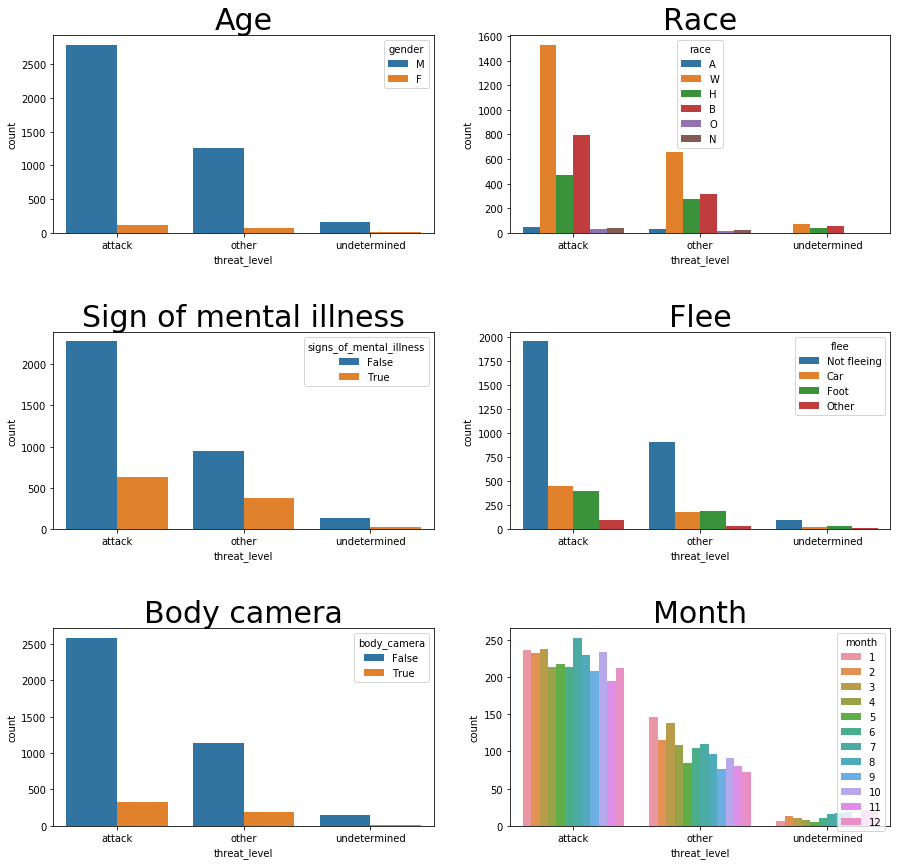

In [44]:
fig = plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(4,2,1)
sns.countplot(data = shootings, x = 'threat_level', hue = 'gender')
ax1.set_title('Age', fontsize = 30)

ax2 = fig.add_subplot(4,2,2)
sns.countplot(data = shootings, x = 'threat_level', hue = 'race')
ax2.set_title('Race', fontsize = 30)

ax3 = fig.add_subplot(4,2,3)
sns.countplot(data = shootings, x = 'threat_level', hue = 'signs_of_mental_illness')
ax3.set_title('Sign of mental illness', fontsize = 30)

ax4 = fig.add_subplot(4,2,4)
sns.countplot(data = shootings, x = 'threat_level', hue = 'flee')
ax4.set_title('Flee', fontsize = 30)

ax5 = fig.add_subplot(4,2,5)
sns.countplot(data = shootings, x = 'threat_level', hue = 'body_camera')
ax5.set_title('Body camera', fontsize = 30)

ax6 = fig.add_subplot(4,2,6)
twenty_fifteen = shootings[(shootings['year'] != 2020)]
sns.countplot(data = twenty_fifteen, x = 'threat_level', hue = 'month')
ax6.set_title('Month', fontsize = 30)


## 5.3 Interestingness in Age?

#### Gender
Men fatally shot by police are general older than women who are fatally shot by police. 

#### Race
White, hispanic, black and native individuals fatally shot by police generally cluster around the meidan at 34. Howevere, white victims are generally older, clustering significantly more than the other races between the ages of 40 and 60. Where Black and Native American victims both have one peak at approx 30 and 32 respectively, Hispanics show two peaks, at approx 32 and 35. 

#### Signs of mental illness
Generally, those who show signs of mental illness are older than those who do not, with peaks at 34 and 36. Howevere, those who show signs of mental illness also cluster between the ages of 40 and 60.

#### Manner of death
The age of those shot and tasered peek at 35 where as those who were simply shot peak at 34. Furthermore there is a greater cluster between the ages of 40 and 55 for those where only shot. 

#### Flee
Older people tend not to flee, showing a significantly greater cluster between the ages of 40 and 80. Those who flee on foot are generally younger than those who flee by car at, peaking at 30 and 33, respectively. 

In [ ]:
not_fleeing = shootings[shootings['flee'] == 'Foot']
not_fleeing.median()

In [ ]:
shootings.columns

Text(0.5, 1.0, 'Age by Year')

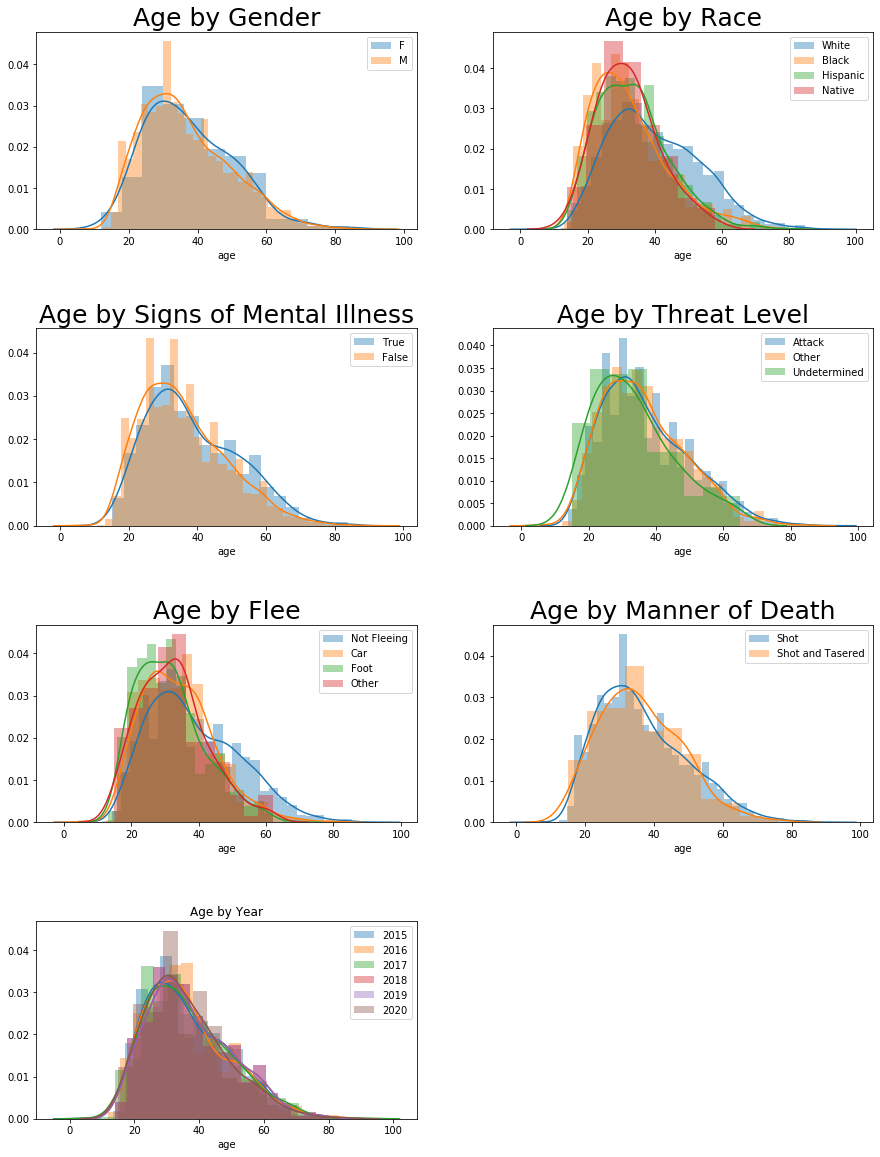

In [51]:
fig = plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(4,2,1)
female = shootings[shootings['gender'] == 'F']
male = shootings[shootings['gender'] == 'M']
sns.distplot(female['age'])
sns.distplot(male['age'])
ax1.legend(labels=['F','M'])
ax1.set_title( 'Age by Gender', fontsize = 25)

ax2 = fig.add_subplot(4,2,2)
white = shootings[shootings['race'] == 'W']
black = shootings[shootings['race'] == 'B']
hispanic = shootings[shootings['race'] == 'H']
native = shootings[shootings['race'] == 'N']
sns.distplot(white['age'])
sns.distplot(black['age'])
sns.distplot(hispanic['age'])
sns.distplot(native['age'])
ax2.legend(labels=['White','Black', 'Hispanic', 'Native'])
ax2.set_title( 'Age by Race', fontsize = 25)


ax3 = fig.add_subplot(4,2,3)
true = shootings[shootings['signs_of_mental_illness'] == True]
false = shootings[shootings['signs_of_mental_illness'] == False]
sns.distplot(true['age'])
sns.distplot(false['age'])
ax3.legend(labels = ['True', 'False'])
ax3.set_title('Age by Signs of Mental Illness', fontsize = 25)


ax4 = fig.add_subplot(4,2,4)
attack = shootings[shootings['threat_level'] == 'attack']
other = shootings[shootings['threat_level'] == 'other']
undetermined = shootings[shootings['threat_level'] == 'undetermined']
sns.distplot(attack['age'])
sns.distplot(other['age'])
sns.distplot(undetermined['age'])
ax4.legend(labels = ['Attack', 'Other', 'Undetermined'])
ax4.set_title('Age by Threat Level', fontsize = 25)

ax5 = fig.add_subplot(4,2,5)
not_fleeing = shootings[shootings['flee'] == 'Not fleeing']
car = shootings[shootings['flee'] == 'Car']
foot = shootings[shootings['flee'] == 'Foot']
other = shootings[shootings['flee'] == 'Other']
sns.distplot(not_fleeing['age'])
sns.distplot(car['age'])
sns.distplot(foot['age'])
sns.distplot(other['age'])
ax5.legend(labels = ['Not Fleeing', 'Car', 'Foot', 'Other'])
ax5.set_title('Age by Flee', fontsize = 25)

ax6 = fig.add_subplot(4,2,6)
shot = shootings[shootings['manner_of_death'] == 'shot']
shot_and_tasered = shootings[shootings['manner_of_death'] == 'shot and Tasered']
sns.distplot(shot['age'])
sns.distplot(shot_and_tasered['age'])
ax6.legend(labels=['Shot','Shot and Tasered'])
ax6.set_title('Age by Manner of Death', fontsize = 25)

ax7 = fig.add_subplot(4,2,7)
tfifteen = shootings[shootings['year'] == 2015]
tsixteen = shootings[shootings['year'] == 2016]
tseventeen = shootings[shootings['year'] == 2017]
teigheen = shootings[shootings['year'] == 2018]
tnineteen = shootings[shootings['year'] == 2019]
ttwenty = shootings[shootings['year'] == 2020]
sns.distplot(tfifteen['age'])
sns.distplot(tsixteen['age'])
sns.distplot(tseventeen['age'])
sns.distplot(tnineteen['age'])
sns.distplot(tnineteen['age'])
sns.distplot(ttwenty['age'])
ax7.legend(labels=['2015', '2016', '2017', '2018', '2019', '2020'])
ax7.set_title('Age by Year')

## 5.4 Interestingness in Gender?

#### Race
The racial demogrpahics of females fataly shot by police more closely mirrors the US population demographics than of men fataly shot. White, black, hispanic and native individuals occupy 63%, 20%, 10% and 2% of all women whereas 50%, 27%, 18% and 0.2% of all men. 

#### Signs of mental illness
Females generally show greater signs of mental illness relative to men, with 34% and 23% respectively. 

#### Flee
Females flee at 10 percentage points less than men at 66% and 76% respectively

#### Threat Level
Generally, males have a higher threat level then females at 66% vs 62%

In [64]:
shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'month', 'year'],
      dtype='object')

In [52]:
female = shootings[shootings['gender'] == 'F']
male = shootings[shootings['gender'] == 'M']


In [53]:
male.race.value_counts(normalize = True)

W    0.506426
B    0.267492
H    0.182294
A    0.018801
N    0.015707
O    0.009281
Name: race, dtype: float64

In [54]:
female.race.value_counts(normalize = True)

W    0.634518
B    0.203046
H    0.101523
O    0.020305
A    0.020305
N    0.020305
Name: race, dtype: float64

In [55]:
male.signs_of_mental_illness.value_counts(normalize = True)

False    0.76892
True     0.23108
Name: signs_of_mental_illness, dtype: float64

In [56]:
female.signs_of_mental_illness.value_counts(normalize = True)

False    0.659898
True     0.340102
Name: signs_of_mental_illness, dtype: float64

In [57]:
male.flee.value_counts(normalize = True)

Not fleeing    0.669919
Foot           0.148263
Car            0.147549
Other          0.034269
Name: flee, dtype: float64

In [58]:
female.flee.value_counts(normalize = True)

Not fleeing    0.761421
Car            0.187817
Foot           0.035533
Other          0.015228
Name: flee, dtype: float64

In [65]:
male.threat_level.value_counts(normalize = True)

attack          0.663494
other           0.298429
undetermined    0.038077
Name: threat_level, dtype: float64

In [66]:
female.threat_level.value_counts(normalize = True)

attack          0.624365
other           0.345178
undetermined    0.030457
Name: threat_level, dtype: float64